In [2]:
from google.colab import files
files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


{'Google_Stock_Price_Test.csv': b'Date,Open,High,Low,Close,Volume\r\n1/3/2017,778.81,789.63,775.8,786.14,"1,657,300"\r\n1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"\r\n1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"\r\n1/6/2017,795.26,807.9,792.2,806.15,"1,640,200"\r\n1/9/2017,806.4,809.97,802.83,806.65,"1,272,400"\r\n1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"\r\n1/11/2017,805,808.15,801.37,807.91,"1,065,900"\r\n1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"\r\n1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"\r\n1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"\r\n1/18/2017,805.81,806.21,800.99,806.07,"1,294,400"\r\n1/19/2017,805.12,809.48,801.8,802.17,"919,300"\r\n1/20/2017,806.91,806.91,801.69,805.02,"1,670,000"\r\n1/23/2017,807.25,820.87,803.74,819.31,"1,963,600"\r\n1/24/2017,822.3,825.9,817.82,823.87,"1,474,000"\r\n1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"\r\n1/26/2017,837.81,838,827.01,832.15,"2,973,900"\r\n1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"\r

In [0]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Importing the training set
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = df_train.iloc[:,1:2].values

In [0]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)

In [0]:
#Data Structure for 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [0]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [8]:
#Importing Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
#Initializing RNN
regressor = Sequential()

W0906 02:54:34.664820 140324987230080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [10]:
#Adding LSTM and dropout layers
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

W0906 02:54:38.971668 140324987230080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 02:54:38.982308 140324987230080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 02:54:39.225272 140324987230080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0906 02:54:39.235659 140324987230080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

In [0]:
#Adding second, third and fourth LSTM layer and dropout layers
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

In [0]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [13]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

W0906 02:54:52.049412 140324987230080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [14]:
#Fitting the RNN to training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

W0906 02:54:57.900009 140324987230080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0906 02:55:00.149335 140324987230080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0551
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

In [0]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_set = df_test.iloc[:,1:2].values

In [0]:
#Getting the predicted values
df_total = pd.concat((df_train['Open'],df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)



In [0]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


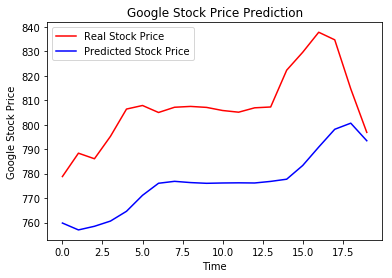

In [21]:
#Visualizing the results
plt.plot(real_set, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()